# Feature Engineering 
# NORMALIZATION

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [105]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns = ['class label','alcohol','malic acid']

In [106]:
df.sample(6)

,class label,alcohol,malic acid
24,1,13.50,1.81
64,2,12.17,1.45
135,3,12.60,2.46
99,2,12.29,3.17
21,1,12.93,3.80
48,1,14.10,2.02


<Axes: xlabel='alcohol', ylabel='Density'>

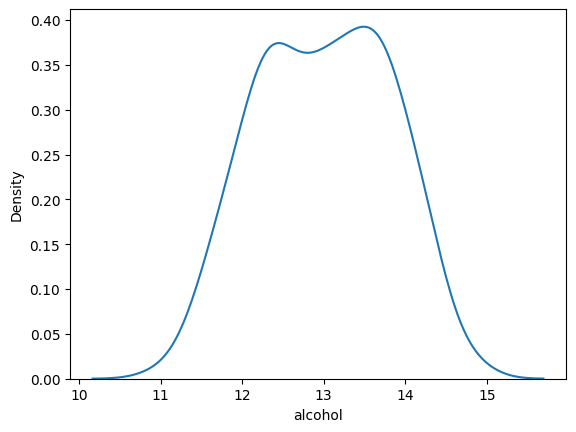

In [109]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

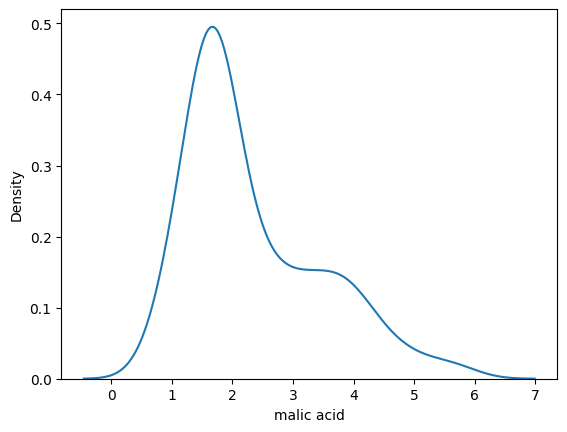

In [110]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohol', ylabel='malic acid'>

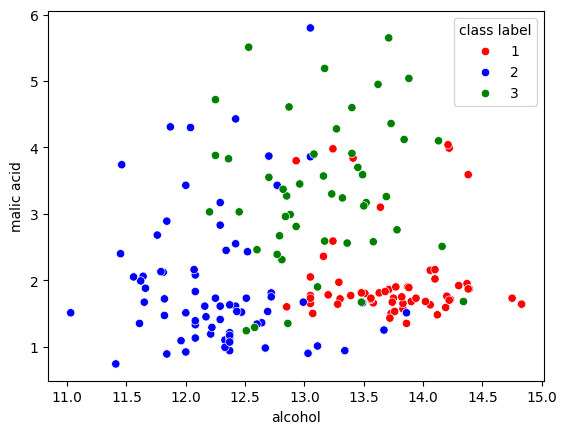

In [123]:
color_dict = {1:'red', 3:'green', 2:'blue'}       # if Class label is integer

# Make sure palette includes all class labels
sns.scatterplot(x=df['alcohol'], y=df['malic acid'], 
                hue=df['class label'], palette=color_dict)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class label', axis=1),
                                                    df['class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [128]:
np.round(X_train.describe(), 1)

,alcohol,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [129]:
np.round(X_train_scaled.describe(), 1)

,alcohol,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


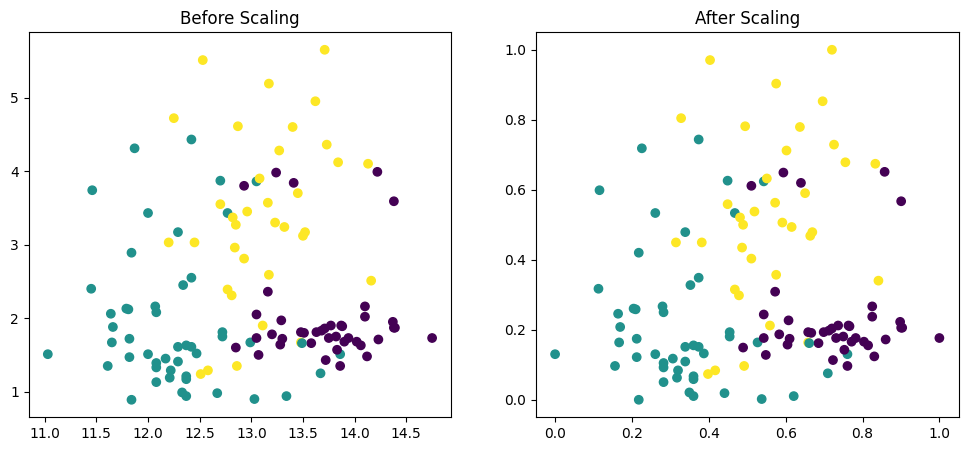

In [132]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['alcohol'], X_train['malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

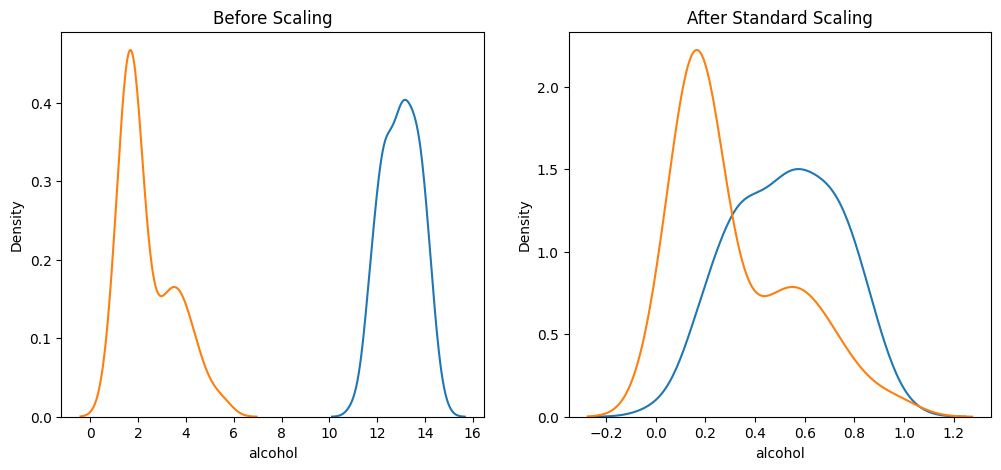

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['malic acid'], ax=ax2)
plt.show()


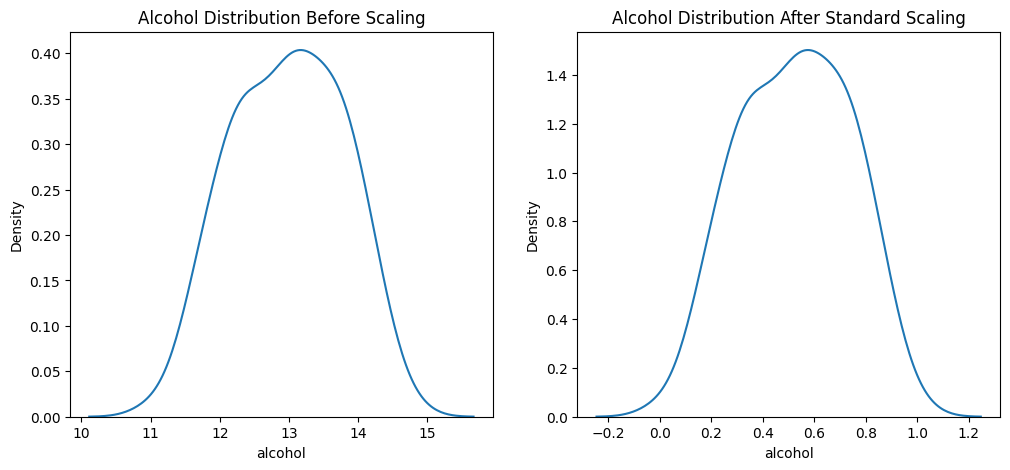

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
plt.show()

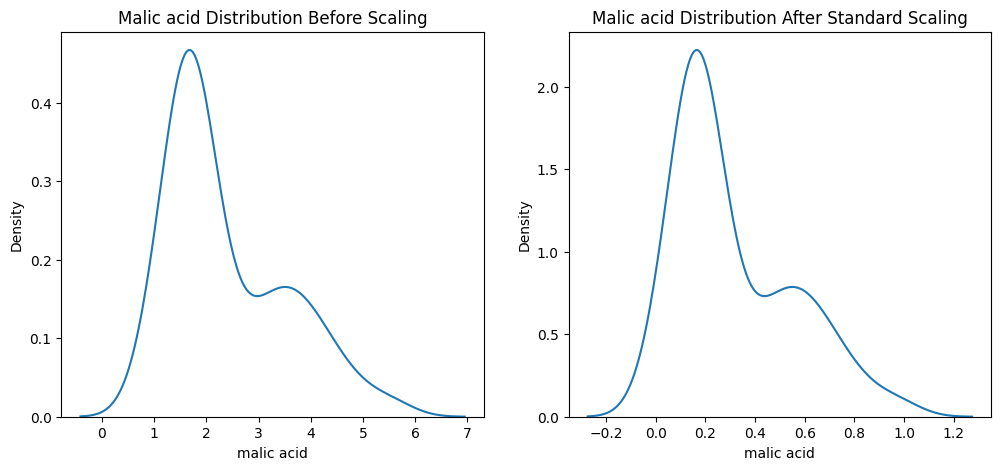

In [136]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['malic acid'], ax=ax2)
plt.show()